<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_4_Extreme_Learning_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise:

*   Choose a different dataset.
*   Rerun the experiment for different numbers of membership functions (***num_mf***), fuzzy rules (***num_rules***), and seed number (***np.random.seed(X)***)
*   Report the results for all the configurations you have tried.
*   Extract the fuzzy rules from the best configuration.

NOTE: the above example code to extract the fuzzy rules is based on a 2-membership system. If you are using more membership functions, modify the code.

Examples of linguistic labels:

2 MF: ["Low", "High"]

3 MF: ["Low", "Medium", "High"]

5 MF: ["VeryLow", "Low", "Medium", "High", "VeryHigh"]

Advantages: very fast, can generate and test many rule-bases in a short time; rule-base is highly interpretable.

Disadvantages: random initialization of rule base; requires large memory if dataset has many features, or using many fuzzy rules and membership functions; pseudo-inverse operation may not produce good outcome; no learning.

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import random
from tqdm import tqdm

In [ ]:
np.random.seed(0)

In [9]:
data = load_iris()
X = data.data
y = data.target

#Normalize input
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
for col in range(X.shape[1]):
  X[:,col] -= np.min(X[:,col])
  X[:,col] /= np.max(X[:,col])

num_feat = X.shape[1]
num_class = len(np.unique(y))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

y_bin = LabelBinarizer().fit_transform(y_train)

In [13]:
#Define a fuzzy system

num_mf = 3 # Num of fuzzy membership functions, if == 3, low.mid.high
num_rules = 10 # Num of fuzzy rules

mf_radius = 1 / (num_mf - 1)
m_centroids = np.zeros((num_mf,num_feat))
for i in range(num_mf):
  m_centroids[i] = i * mf_radius

print(m_centroids)

[[0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [1.  1.  1.  1. ]]


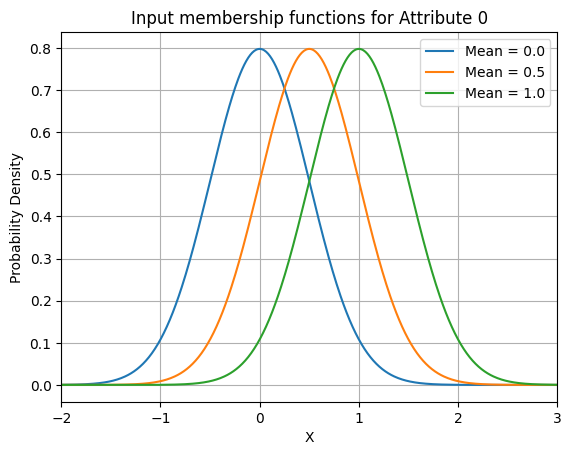

In [16]:
#Plotting the Gaussian curve for Attribute 0
def gaussian(x,mean,std_dev):
   return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

x_example = np.linspace(-5,5,1000)
for mean in m_centroids[:,0]:
  y_example = gaussian(x_example,mean,mf_radius)
  plt.plot(x_example,y_example,label = f"Mean = {mean}")

plt.xlabel('X')
plt.xlim(-2,3)
plt.ylabel('Probability Density')
plt.title("Input membership functions for Attribute 0")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
m_rule = np.round(np.random.rand(num_rules,num_feat,num_mf))

current_rule = m_rule[0]
print(current_rule)

# First row - feature 1, second row - feature 2,n row - feature n
#[1. 0. 1.] - If F1 is Low or High


[[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
